# Overview

This notebook demonstrates how to calculate and update the Matrix Profile for a sample dataset (this is the same example signal used in https://github.com/aouyang1/go-matrixprofile)

# Load Libraries

In [1]:
from matrixprofile import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

c:\users\user\matrixprofile-ts\matrixprofile\matrixProfile.py:143: SyntaxWarning: "is" with 'int' literal. Did you mean "=="?
  if n_threads is -1:


# Load and visualize sample data

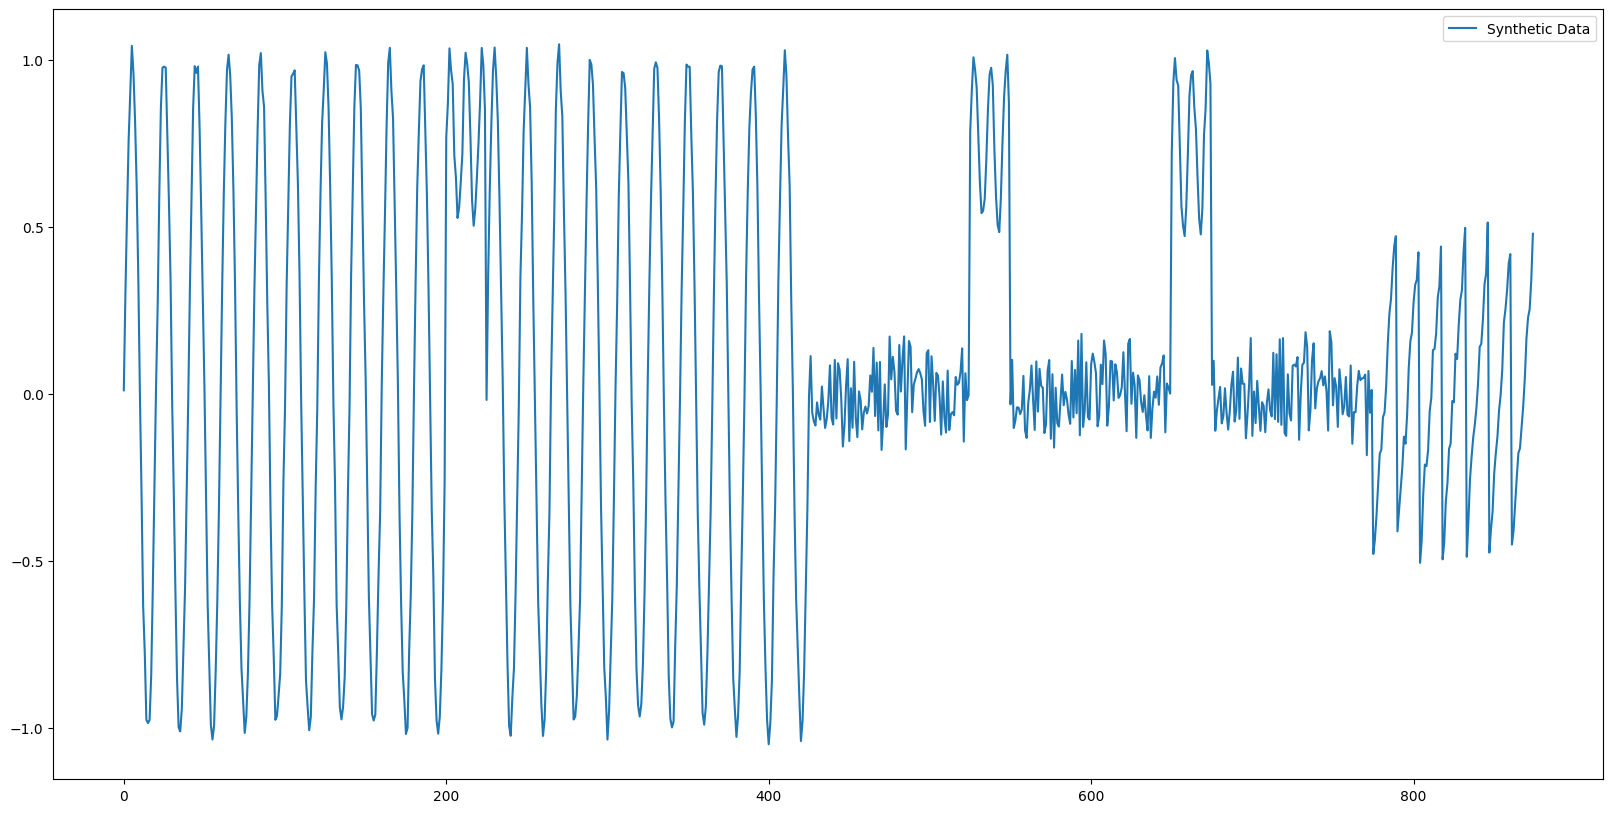

In [2]:
data = pd.read_csv("rawdata.csv")
pattern = data.data.values

#Plot data
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
legend = ax1.legend(loc='upper right')

# Calculate the Matrix Profile

In [3]:
m = 32
v = 1
mp = matrixProfile.stomp(pattern, m, v)

# Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
cac = fluss.fluss(mp[1], m)

TypeError: _matrixProfile_stomp() takes from 4 to 5 positional arguments but 6 were given

Text(0.5, 0, 'Sample')

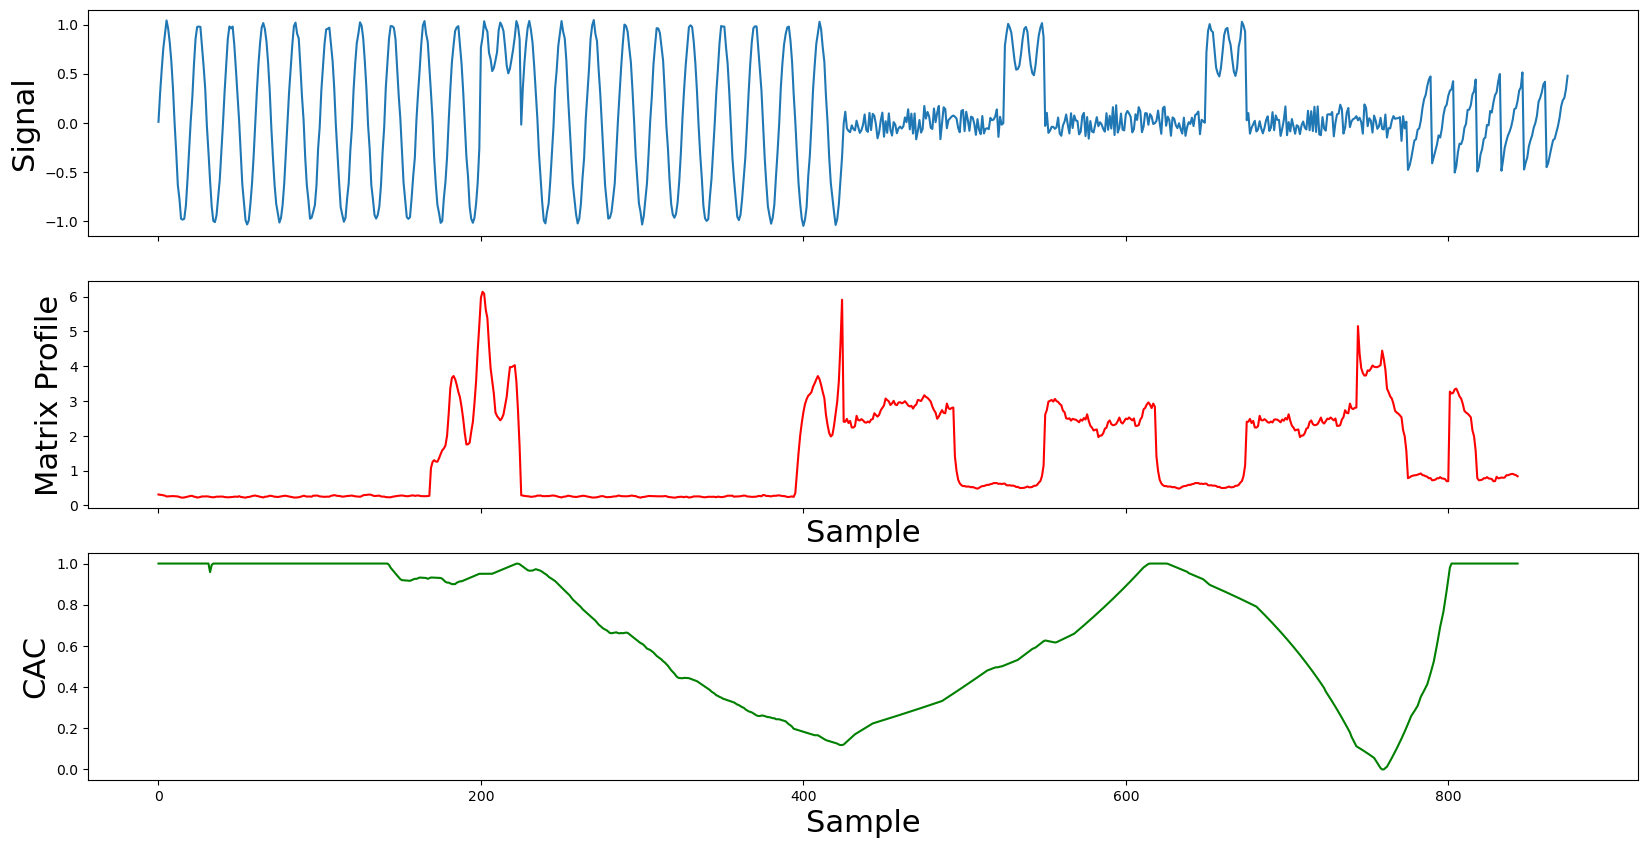

In [ ]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#Plot the CAC
ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green')
ax3.set_ylabel('CAC', size=22)
ax3.set_xlabel('Sample', size=22)


In [ ]:
m = 32
v=2
mp_BOH = matrixProfile.stomp(pattern, m, v)

# Bonus: calculate the corrected arc curve (CAC) to do semantic segmantation.
cac = fluss.fluss(mp_BOH[1], m)

Text(0.5, 0, 'Sample')

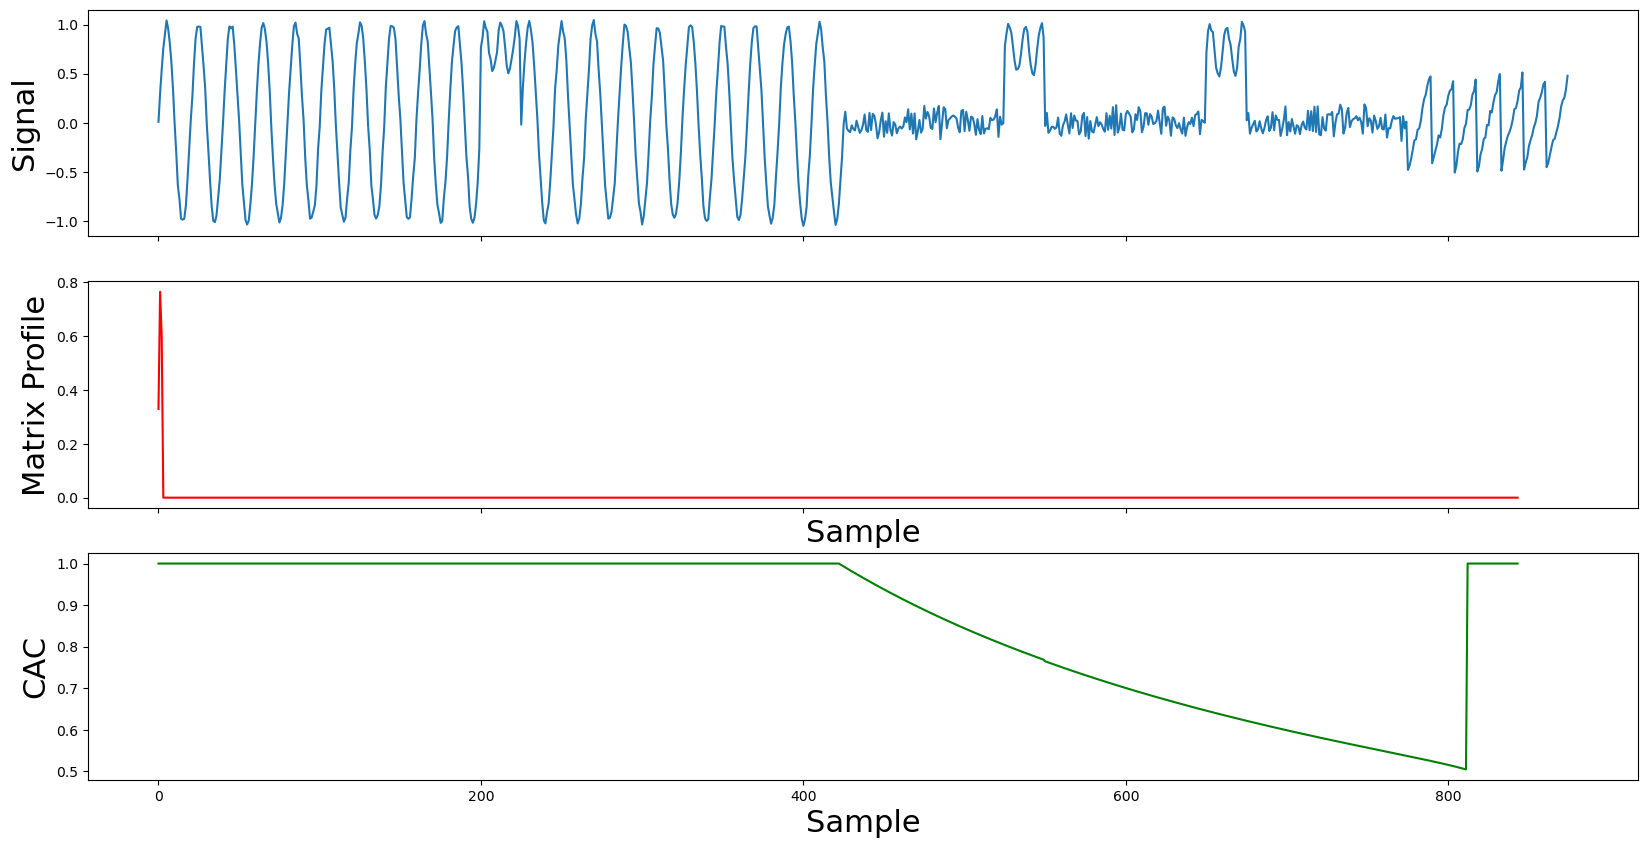

In [ ]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp_BOH[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#Plot the CAC
ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green')
ax3.set_ylabel('CAC', size=22)
ax3.set_xlabel('Sample', size=22)

In [12]:
m = 32
v = 3
mp= matrixProfile.sampled_stomp(pattern, m, v)

# Calcola la CAC usando la lunghezza originale per la segmentazione
#cac = fluss.fluss(mpi, m)

In [ ]:
mp, mpi = matrixProfile.compatible_stomp(pattern, m=32, v=2)
cac = fluss.fluss(mpi, m)  # Ora funzionerà

TypeError: _matrixProfile_stomp() takes from 4 to 5 positional arguments but 6 were given

Text(0.5, 0, 'Sample')

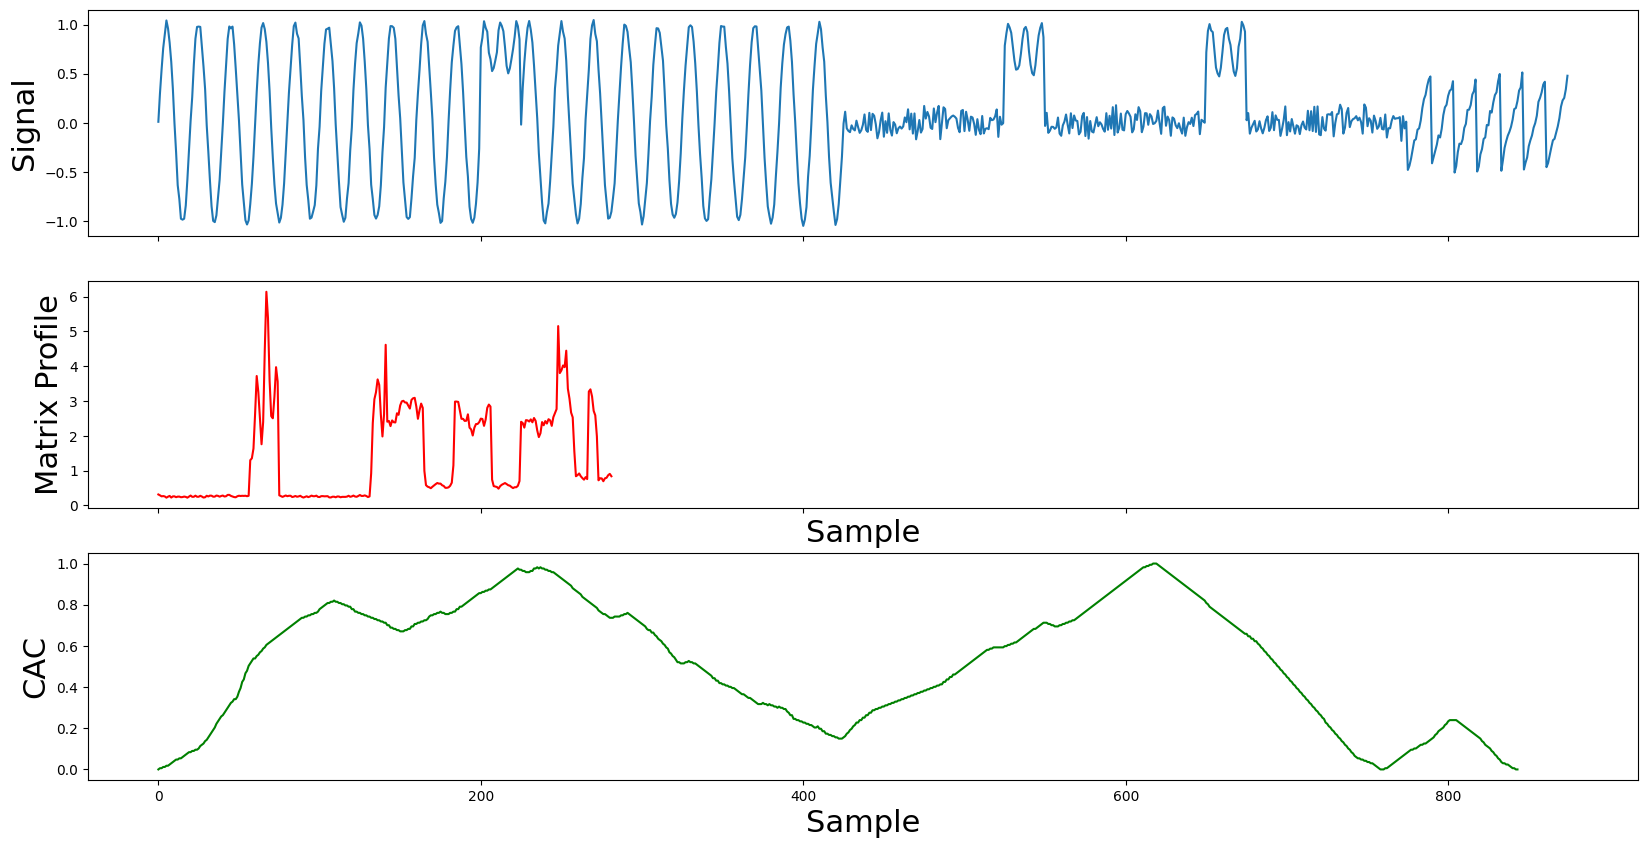

In [13]:
#Append np.nan to Matrix profile to enable plotting against raw data
mp_adj = np.append(mp[0],np.zeros(m-1)+np.nan)

#Plot the signal data
fig, (ax1, ax2, ax3) = plt.subplots(3,1,sharex=True,figsize=(20,10))
ax1.plot(np.arange(len(pattern)),pattern, label="Synthetic Data")
ax1.set_ylabel('Signal', size=22)

#Plot the Matrix Profile
ax2.plot(np.arange(len(mp_adj)),mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Sample', size=22)

#Plot the CAC
ax3.plot(np.arange(len(cac)),cac, label="CAC", color='green')
ax3.set_ylabel('CAC', size=22)
ax3.set_xlabel('Sample', size=22)

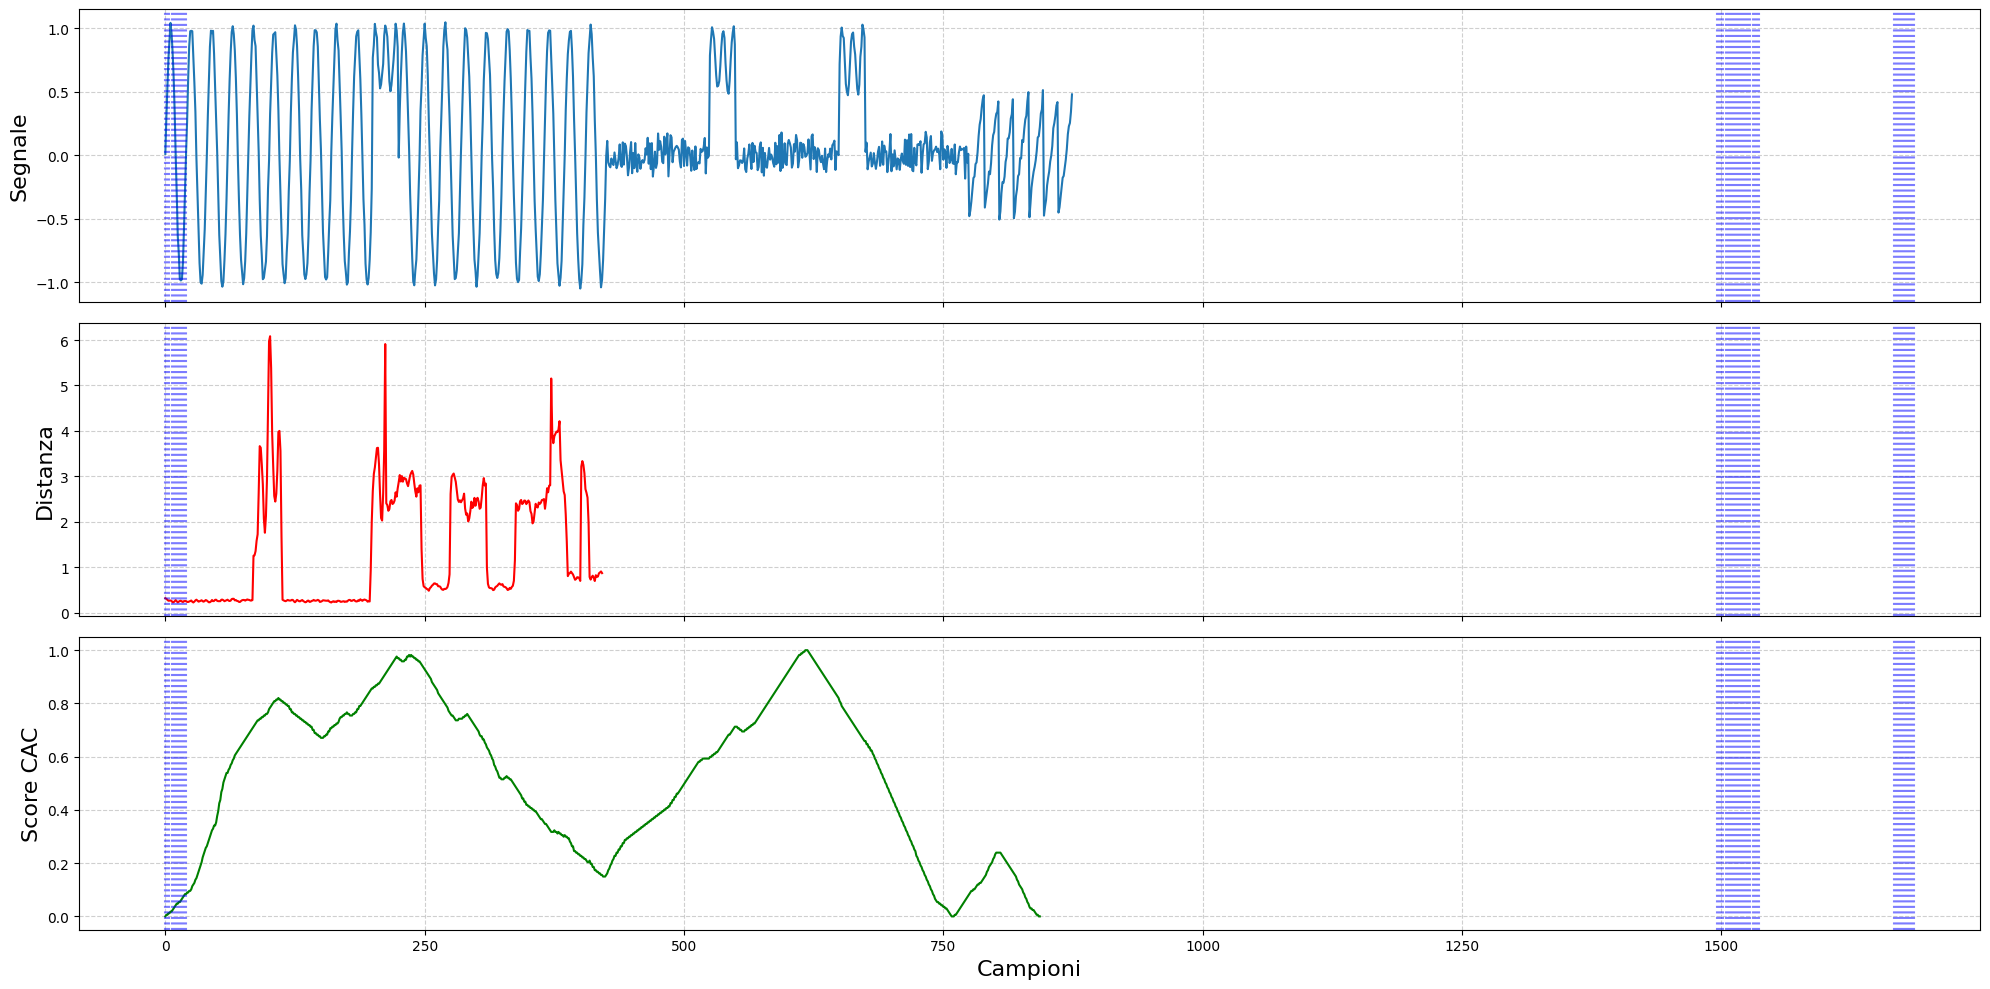

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matrixprofile import matrixProfile, fluss

# Calcolo del Matrix Profile con subsampling
m = 32
v = 2
mp, mpi = matrixProfile.sampled_stomp(pattern, m, v)

# Calcolo della CAC - versione corretta per subsampling
cac = matrixProfile.compute_cac(mpi, m, len(pattern), v)  # Aggiungi v come parametro

# Preparazione dei dati per il plotting
mp_adj = np.append(mp, np.zeros(m-1)+np.nan)
cac_adj = np.append(cac, np.zeros(m-1)+np.nan)

# Creazione del plot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(20, 10))

# 1. Plot del segnale originale
ax1.plot(np.arange(len(pattern)), pattern, label="Dati Originali")
ax1.set_ylabel('Segnale', size=16)
ax1.grid(True, linestyle='--', alpha=0.6)

# 2. Plot del Matrix Profile
ax2.plot(np.arange(len(mp_adj)), mp_adj, label="Matrix Profile", color='red')
ax2.set_ylabel('Distanza', size=16)
ax2.grid(True, linestyle='--', alpha=0.6)

# 3. Plot della CAC
ax3.plot(np.arange(len(cac_adj)), cac_adj, label="CAC", color='green')
ax3.set_ylabel('Score CAC', size=16)
ax3.set_xlabel('Campioni', size=16)
ax3.grid(True, linestyle='--', alpha=0.6)

# Aggiunta delle linee di segmentazione
minima = np.where(cac < np.percentile(cac, 5))[0]
for ax in (ax1, ax2, ax3):
    for pos in minima:
        ax.axvline(x=pos*v, color='blue', linestyle=':', alpha=0.5)  # Modifica qui

plt.tight_layout()
plt.show()